### Goal is to classify the different Iris species and compare the different Support Vector Machines (SVM) on accuracy

In [2]:
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from pathlib import Path


In [3]:
path = Path("../data/Iris.csv")
df = pd.read_csv(path)

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


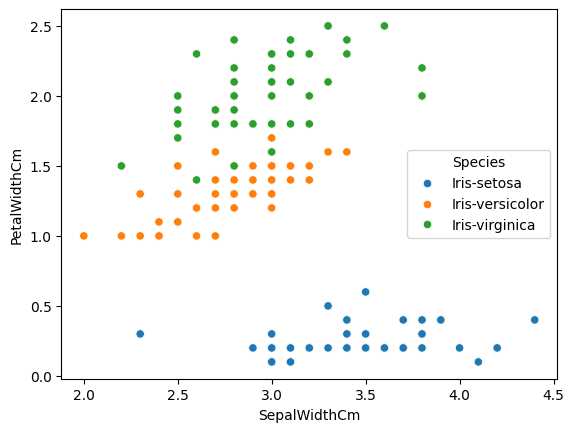

In [5]:
sns.scatterplot(df, x="SepalWidthCm", y="PetalWidthCm", hue="Species");

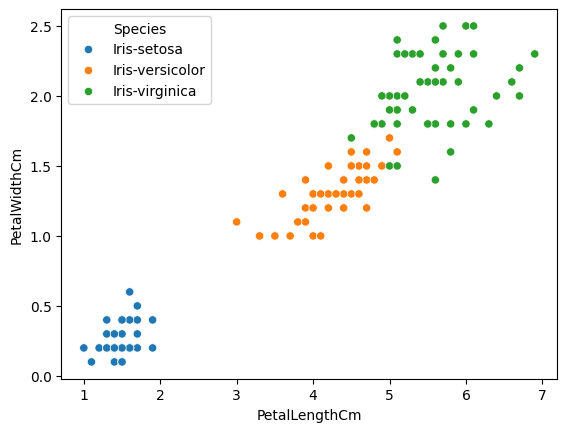

In [6]:
sns.scatterplot(df, x="PetalLengthCm", y="PetalWidthCm", hue="Species");

In [ ]:
# Setting Target and features
X = df.drop("Species", axis=1)
y = df["Species"]

In [ ]:
# Splitting the data 80/20 (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating 4 different SVM models
clf_linear = svm.SVC(kernel="linear", random_state=42)
clf_poly = svm.SVC(kernel="poly", random_state=42)
clf_sigmoid = svm.SVC(kernel="sigmoid", random_state=42)
clf_rbf = svm.SVC(kernel="rbf", random_state=42)

In [ ]:
# Standardizing the training data (0-1)
scaler = StandardScaler()
scaler.fit(X_train) # Fit to data

,copy,True
,with_mean,True
,with_std,True


In [ ]:
# Fits transformer to X_* and returns a transformed version of X_*
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Models trains on the scaled X and y_train
clf_linear.fit(X_train_scaled, y_train)
clf_poly.fit(X_train_scaled, y_train)
clf_sigmoid.fit(X_train_scaled, y_train)
clf_rbf.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# Models predicts on the scaled test set
pred_linear = clf_linear.predict(X_test_scaled)
pred_poly = clf_poly.predict(X_test_scaled)
pred_sigmoid = clf_sigmoid.predict(X_test_scaled)
pred_rbf = clf_rbf.predict(X_test_scaled)

In [ ]:
# Saving results
acc_linear = (accuracy_score(y_test, pred_linear) * 100)
acc_poly = (accuracy_score(y_test, pred_poly)  * 100)
acc_sigmoid = (accuracy_score(y_test, pred_sigmoid) * 100)
acc_rbf = (accuracy_score(y_test, pred_rbf) * 100)


In [ ]:
# Printing results
print("Accuracies:")
print(f"Linear:{acc_linear} %")
print(f"Poly: {acc_poly} %")
print(f"Sigmoid: {acc_sigmoid} %")
print(f"Rbf: {acc_rbf} %")

Accuracies:
Linear:100.0 %
Poly: 100.0 %
Sigmoid: 96.66666666666667 %
Rbf: 100.0 %


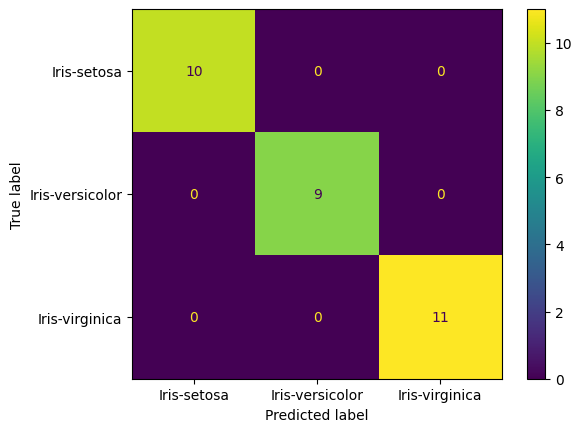

In [ ]:
# Confusion Matrix (Model: Linear)
cm = confusion_matrix(y_test, pred_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_linear.classes_)
disp.plot();

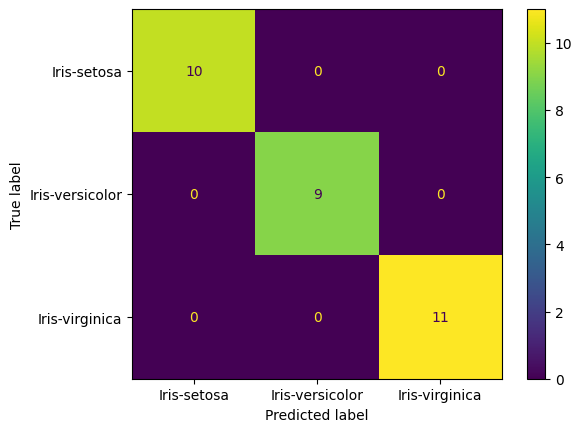

In [ ]:
# Confusion Matrix (Model: Poly)
cm = confusion_matrix(y_test, pred_poly)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_poly.classes_)
disp.plot();

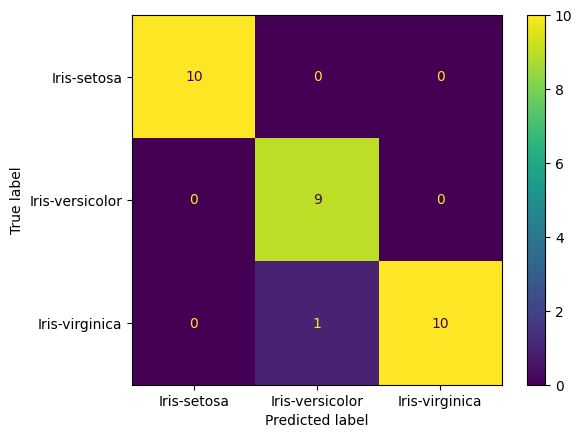

In [ ]:
# Confusion Matrix (Model: Poly)
cm = confusion_matrix(y_test, pred_sigmoid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_sigmoid.classes_)
disp.plot();

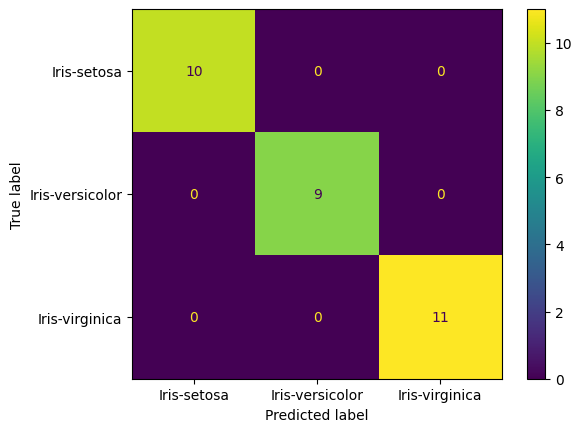

In [ ]:
# Confusion Matrix (Model: Rbf)
cm = confusion_matrix(y_test, pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rbf.classes_)
disp.plot();